In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import sys
import matplotlib as mpl
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()    
font_name
plt.rc('font', family=font_name)
mpl.rcParams["axes.unicode_minus"]=False    #마이너스를 문자로 쓰지 않고 숫자로 쓰겠다. 라는 뜻

<font color=red>

## CNN & RNN & CRNN
</font>

    ★★★★★★★★★★★★ CNN ★★★★★★★★★★★★★
    CNN이 뭔지 개념을 잘 알아두시게
    이미지 구별을 위해 만들은 알고리즘이지만
    요즘에는 자연어 처리에도 많이 사용되고 있음

    (1) CNN(Convolutional Neural Networks)
        - 전체를 한번에 보는게 아니라 각 일부분을 봐서 합쳐 보는 것?
        ex) 1_차 이미지를 인식하는 것
            - 이미지를 부분부분 쪼개서 가져와서 인식
            - 각 부분의 특징을 뽑아내는 것이 중요
            - 각 부분에 대한 특징을 뽑아 Convolution layers를 추출하고 그 데이터로 학습,
              마지막으로 거치는 과정이 FC(Fully Connected : 인공신경망 연결)

        1) Convolution Layers : 필터=가중치
            - 선형알고리즘(Wx+b)으로 부분의 특징을 뽑아냄 / ReLU로 뽑기도 함
           ※ Stride
               - 크기가 축소되면서 특징을 뽑아낸다고???
               - Maybe. 7*7의 이미지를 3*3 필터로 특징을 뽑을 때
                 3*3짜리가 세로로 1칸씩 5번 옮기면 7*7이미지의 세로를 모두 필터링하고
                 각 3*3짜리 특징이 5개니까 의 데이터로 축소된다는 의미인것 같습니다.
               - 4*4로 3번 옮기는 등 필터 사이즈에 따라 달라지게찌 머 그런거인듯
                 (나는 아는게 없습니다)
           ※ Padding
               - 전체 사이즈의 각 면 바깥에 0의 데이터가 추가되어 아웃풋 사이즈를 맞춰주는 그런건가?
               - 이미지 크기를 보정하기 위해 사용하는게 일반적
               - 어디가 경계선인지 확인할 수 있게 해주는 기능도 있음
               - 위에서 7*7짜리가 5*5로 나오게 되는것을 원래대로 7*7로 나오게 해준다는데
                 어째서 그렇게 되는건지를 못들었는데요 ㅅㅂ...
            - 하나의 필터가 (Stride과정을 거쳐셔?) 하나의 layer를 만들고
              여러개의 필터는 여러개 layer를 만들쥬
        2) MAX Pooling Layer : 필터=가장큰값
            - min / average / max 중에서 max가 가장 많이 사용 됨
            - Wx+b으로 특징을 뽑은 Convolution layers와 다르게 필터에서 가장 큰 값을 뽑아냄
        -------여기까지 전처리-------
        3) Fully Connected Layer 
            - 입력 출력 뭐?
            - 
        


    (2) RNN(Recurrent Neural Network)
        - 

    (3) CRNN


shape :  (1, 2, 2, 1)
축의 방향을 바꿈: [[[[12.]
   [16.]]

  [[24.]
   [28.]]]]
차원 변경: [[12. 16.]
 [24. 28.]]
shape :  (1, 3, 3, 1)
축의 방향을 바꿈: [[[[12.]
   [16.]
   [ 9.]]

  [[24.]
   [28.]
   [15.]]

  [[15.]
   [17.]
   [ 9.]]]]
차원 변경: [[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
shape :  (1, 3, 3, 3)
축의 방향을 바꿈: [[[[ 12.]
   [ 16.]
   [  9.]]

  [[ 24.]
   [ 28.]
   [ 15.]]

  [[ 15.]
   [ 17.]
   [  9.]]]


 [[[120.]
   [160.]
   [ 90.]]

  [[240.]
   [280.]
   [150.]]

  [[150.]
   [170.]
   [ 90.]]]


 [[[-12.]
   [-16.]
   [ -9.]]

  [[-24.]
   [-28.]
   [-15.]]

  [[-15.]
   [-17.]
   [ -9.]]]]
차원 변경: [[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
차원 변경: [[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
차원 변경: [[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


C:\Users\acorn\AppData\Local\Continuum\anaconda3\envs\tf1\lib\site-packages\ipykernel_launcher.py:58: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


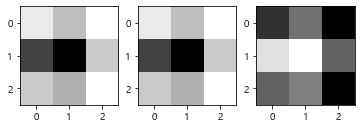

In [30]:
# 3*3*1 이미지 (넓이 3 높이 3 흑백(1)) 준비
# 2*2*1 필터

## 이미지데이터 작성
image = np.array([[[[1], [2], [3]],
                  [[4], [5], [6]],
                  [[7], [8], [9]]]], dtype=np.float32)

plt.imshow(image.reshape(3,3), cmap="Greys") # 이미지를 2차원 데이터로 넘겨줘야 볼 수 있어염 

## 필터
"""
array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]], dtype=float32)
일때 필터 2*2면 첫번째 필터는
[[1., 2.],
 [4., 5.]]
그럼 가중치는 각
w1x1 + w2x2 + w3x3 + w4x4 + b
→1x1 + 2x2 + 4x3 + 5x4 + b
"""
############### padding 없이 Convolution layers 추출
filter = tf.constant([[[[1.]], [[1.]]],
                     [[[1.]], [[1.]]]])

### Convolution Layer 추출 : tf.conv2d(원본이미지, 필터. stride=[1(=Default), 가로, 세로, 1(=Default)])
conv2d = tf.nn.conv2d(image, filter, strides=[1, 1, 1, 1], padding="VALID")
sess = tf.Session()# 실행
conv2d_img = sess.run(conv2d) # shape :  (1, 2, 2, 1) / 3*3에 2*2 필터 적용해서 나온 2*2데이터
print("shape : ", conv2d_img.shape)

### Convolution layers를 시각화 (강사님 코드)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
print("축의 방향을 바꿈:", conv2d_img)
for i, one_img in enumerate(conv2d_img):
    print("차원 변경:", one_img.reshape(2, 2))
    plt.subplot(1, 2, i+1)
    plt.imshow(one_img.reshape(2,2), cmap="Greys")

sess.close()

############### padding을 이용한 Convolution layers 추출
filter = tf.constant([[[[1.]], [[1.]]],
                     [[[1.]], [[1.]]]])

### Convolution Layer 추출
conv2d = tf.nn.conv2d(image, filter, strides=[1, 1, 1, 1], padding="SAME") ##### padding 설정을 원본사이즈와 같게 하겠다
sess = tf.Session()
conv2d_img = sess.run(conv2d)
print("shape : ", conv2d_img.shape)

### Convolution layers를 시각화 (강사님 코드)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
print("축의 방향을 바꿈:", conv2d_img)
for i, one_img in enumerate(conv2d_img):
    print("차원 변경:", one_img.reshape(3, 3))
    plt.subplot(1, 2, i+1)
    plt.imshow(one_img.reshape(3,3), cmap="Greys")

sess.close()

###########################   3개의 필터 사용 (필터이미지가 3개 만들어짐)   ###########################
# 필터 값 : 임의의 값으로 추가 왜 임의의 값인데? 외 않말해줨?
filter = tf.constant([[[[1., 10, -1]], [[1., 10, -1]]],
                     [[[1., 10, -1]], [[1., 10, -1]]]])

### Convolution Layer 추출
conv2d = tf.nn.conv2d(image, filter, strides=[1, 1, 1, 1], padding="SAME") ##### padding 설정을 원본사이즈와 같게 하겠다
sess = tf.Session()
conv2d_img = sess.run(conv2d)
print("shape : ", conv2d_img.shape)

### Convolution layers를 시각화 (강사님 코드)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
print("축의 방향을 바꿈:", conv2d_img)
for i, one_img in enumerate(conv2d_img):
    print("차원 변경:", one_img.reshape(3, 3))
    plt.subplot(1, 3, i+1)
    plt.imshow(one_img.reshape(3,3), cmap="Greys")

sess.close()

shape :  (1, 3, 3, 1)
축의 방향을 바꿈: [[[[12.]
   [16.]
   [15.]]

  [[24.]
   [28.]
   [29.]]

  [[21.]
   [31.]
   [29.]]]]
차원 변경: [[12. 16. 15.]
 [24. 28. 29.]
 [21. 31. 29.]]
shape :  (1, 4, 4, 1)
축의 방향을 바꿈: [[[[12.]
   [16.]
   [15.]
   [ 6.]]

  [[24.]
   [28.]
   [29.]
   [14.]]

  [[21.]
   [31.]
   [29.]
   [11.]]

  [[ 6.]
   [14.]
   [11.]
   [ 2.]]]]
차원 변경: [[12. 16. 15.  6.]
 [24. 28. 29. 14.]
 [21. 31. 29. 11.]
 [ 6. 14. 11.  2.]]
shape :  (1, 4, 4, 3)
축의 방향을 바꿈: [[[[ 12.]
   [ 16.]
   [ 15.]
   [  6.]]

  [[ 24.]
   [ 28.]
   [ 29.]
   [ 14.]]

  [[ 21.]
   [ 31.]
   [ 29.]
   [ 11.]]

  [[  6.]
   [ 14.]
   [ 11.]
   [  2.]]]


 [[[120.]
   [160.]
   [150.]
   [ 60.]]

  [[240.]
   [280.]
   [290.]
   [140.]]

  [[210.]
   [310.]
   [290.]
   [110.]]

  [[ 60.]
   [140.]
   [110.]
   [ 20.]]]


 [[[-12.]
   [-16.]
   [-15.]
   [ -6.]]

  [[-24.]
   [-28.]
   [-29.]
   [-14.]]

  [[-21.]
   [-31.]
   [-29.]
   [-11.]]

  [[ -6.]
   [-14.]
   [-11.]
   [ -2.]]]]
차원 변경: [[12. 1

C:\Users\acorn\AppData\Local\Continuum\anaconda3\envs\tf1\lib\site-packages\ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


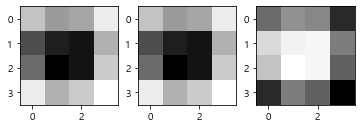

In [31]:
# 걍 셀프 테스트

## 이미지데이터 작성
image = np.array([[[[1], [2], [3], [1]],
                  [[4], [5], [6], [5]],
                  [[7], [8], [9], [9]],
                  [[1], [5], [9], [2]]]], dtype=np.float32)
plt.imshow(image.reshape(4,4), cmap="Greys")

### padding 없이 Convolution layers 추출
filter = tf.constant([[[[1.]], [[1.]]],
                     [[[1.]], [[1.]]]])

### tf.conv2d(원본이미지, 필터. stride=[1(=Default), 가로, 세로, 1(=Default)])
conv2d = tf.nn.conv2d(image, filter, strides=[1, 1, 1, 1], padding="VALID")
sess = tf.Session()# 실행
conv2d_img = sess.run(conv2d) # shape :  (1, 3, 3, 1) / 3*3에 2*2 필터 적용해서 나온 2*2데이터
print("shape : ", conv2d_img.shape)

### Convolution layers를 시각화 (강사님 코드)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
print("축의 방향을 바꿈:", conv2d_img)
for i, one_img in enumerate(conv2d_img):
    print("차원 변경:", one_img.reshape(3, 3))
    plt.subplot(1, 2, i+1)
    plt.imshow(one_img.reshape(3,3), cmap="Greys")

sess.close()

############### padding을 이용한 Convolution layers 추출
filter = tf.constant([[[[1.]], [[1.]]],
                     [[[1.]], [[1.]]]])

### Convolution Layer 추출
conv2d = tf.nn.conv2d(image, filter, strides=[1, 1, 1, 1], padding="SAME") ##### padding 설정을 원본사이즈와 같게 하겠다
sess = tf.Session()
conv2d_img = sess.run(conv2d)
print("shape : ", conv2d_img.shape)

### Convolution layers를 시각화 (강사님 코드)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
print("축의 방향을 바꿈:", conv2d_img)
for i, one_img in enumerate(conv2d_img):
    print("차원 변경:", one_img.reshape(4, 4))
    plt.subplot(1, 2, i+1)
    plt.imshow(one_img.reshape(4,4), cmap="Greys")

sess.close()

###########################   3개의 필터 사용 (필터이미지가 3개 만들어짐)   ###########################
# 필터 값 : 임의의 값으로 추가 왜 임의의 값인데? 외 않말해줨?
filter = tf.constant([[[[1., 10, -1]], [[1., 10, -1]]],
                     [[[1., 10, -1]], [[1., 10, -1]]]])

### Convolution Layer 추출
conv2d = tf.nn.conv2d(image, filter, strides=[1, 1, 1, 1], padding="SAME") ##### padding 설정을 원본사이즈와 같게 하겠다
sess = tf.Session()
conv2d_img = sess.run(conv2d)
print("shape : ", conv2d_img.shape)

### Convolution layers를 시각화 (강사님 코드)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
print("축의 방향을 바꿈:", conv2d_img)
for i, one_img in enumerate(conv2d_img):
    print("차원 변경:", one_img.reshape(4, 4))
    plt.subplot(1, 3, i+1)
    plt.imshow(one_img.reshape(4,4), cmap="Greys")

sess.close()

In [32]:
###########################   MaxPooling(2*2)   ###########################
# 3*3*1 이미지 (넓이 3 높이 3 흑백(1)) 준비
# 2*2*1 필터

## 이미지데이터 작성
image2 = tf.constant([[[[4], [3]],
                       [[2], [1]]]])

# plt.imshow(image2.reshape(2,2), cmap="Greys") # 텐서로 만든거라 run()전에 볼 수 없음

# Max Pooling으로 최대값이 어떻게 추출되는가
## ksize=[1, 2, 2, 1] : 커널사이즈(=필터사이즈)
pool = tf.nn.max_pool(image2, ksize=[1, 2, 2, 1], strides=[1, 1, 1, 1], padding="VALID")

sess = tf.Session()
p = sess.run(pool)
print(p.shape) # (1, 1, 1, 1)
print(p) # [[[[4]]]] : 가장 큰 값인 4가 뽑혀져 나온 것 (MaxPooling 은 필터 영역 중에서 가장 큰 값을 뽑아오는 거니까!)

sess.close()

(1, 1, 1, 1)
[[[[4]]]]


<font color=green><b>

### CNN 실습예제_MNIST
</b></font>

    https://docs.google.com/presentation/d/1h90rpyWiVlwkuCtMgTLfAVKIiqJrFunnKR7dqPNtI6I/edit#slide=id.g1ee4a504dd_0_0
    
    

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("data/MNIST_data", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data/MNIST_data\t10k-images-idx3-ubyte.gz
Extracting data/MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


<font color=red><b>

#### < 데이터 확인 & 입력값 준비 >
</b></font>

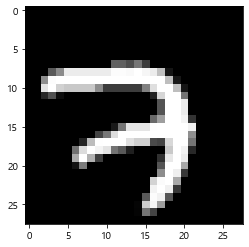

In [21]:
img = mnist.train.images[0]
img.shape # (784,)

plt.imshow(img.reshape(28, 28), cmap="gray") # 2차원으로만 들어가니까 1차원 (784,) → 2차원 28*28

X = tf.placeholder(tf.float32, shape=[None, 28*28])
y = tf.placeholder(tf.float32, shape=[None, 10])

<font color=red><b>

#### < 첫번째 Convolution Layer 준비 >
</b></font>

In [22]:
# 1차원 MNIST 데이터 4차원으로 Reshape
## tf.reshape(X, [이미지갯수, 가로, 세로, 색])
## 이미지갯수 -1 = None
X_img = tf.reshape(X, [-1, 28, 28, 1]) # 이미지갯수 미지정의 가로 28, 세로 28, 흑백(1) 이미지로 Reshpae


# 필터(크기 3*3 / 갯수 32개 / 색상 수 1) 준비
#    * 필터사이즈 & 스트라이드 사이즈는 조절해가면서 성능 조절~~~~~
# Convolution layer는 가중치로 뽑는거니까
# W = tf.Variable(tf.random_normal(가로, 세로, 색상, 갯수), stddev=이게머라구?)로 준비하긔
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))

In [23]:
# Convolution Layer
## L1 = tf.nn.conv2d(이미지데이터, 필터, strides=[디퐅트1, 가로1, 세로1, 디폴트1], padding="SAME")
L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding="SAME")
print(L1)
"""
<tf.Tensor 'Conv2D_1:0' shape=(?, 28, 28, 32) dtype=float32>
"""
L1 = tf.nn.relu(L1)
print(L1,"\n→못들음")

# Convolution Layer으로 뽑은 이미지에서 Max Pooling Layer
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="SAME")
print(L1, "\n→패딩이 SAME이지만 스트라이드 사이즈가 1, 1에서 2, 2로 올라서 원래 28*28에서 14*14로 줄어들음")

Tensor("Conv2D_7:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("Relu_4:0", shape=(?, 28, 28, 32), dtype=float32) 
→못들음
Tensor("MaxPool_5:0", shape=(?, 14, 14, 32), dtype=float32) 
→패딩이 SAME이지만 스트라이드 사이즈가 1, 1에서 2, 2로 올라서 원래 28*28에서 14*14로 줄어들음


<font color=red><b>

#### < 두번째 Convolution Layer 준비 >
</b></font>

    - 첫번째 Convolution Layer에서 한번 더 특징을 뽑아내겠따

In [24]:
# 필터(크기 3*3 / 갯수 64개 / 색상 수 1) 준비
# W = tf.Variable(tf.random_normal(가로, 세로, 색상, 갯수), stddev=이게머라구?)로 준비하긔
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
# 아니 3번째꺼 색상이라면서요 근데 왜 갖고온 갯수가 32개니까 3번째에 32개 넣는다고 하시는데요;;;;;
# 아 처음 받을때는 색상 수인데 두번째에서는 이전꺼 갯수로 받는다고요
# 왜 그러는건데...?

In [25]:
# Convolution Layer
## L1 = tf.nn.conv2d(첫번째 Convolution layer, 2번째필터, strides=[디퐅트1, 가로1, 세로1, 디폴트1], padding="SAME")
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding="SAME")
print(L2)
"""
<tf.Tensor 'Conv2D_1:0' shape=(?, 28, 28, 32) dtype=float32>
"""
L2 = tf.nn.relu(L2)
print(L2,"\n→못들음")

# Convolution Layer으로 뽑은 이미지에서 Max Pooling Layer
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="SAME")
print(L2, "\n→패딩이 SAME이지만 스트라이드 사이즈가 1, 1에서 2, 2로 올라서 원래 14*14에서 7*7로 줄어들음")

Tensor("Conv2D_8:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("Relu_5:0", shape=(?, 14, 14, 64), dtype=float32) 
→못들음
Tensor("MaxPool_6:0", shape=(?, 7, 7, 64), dtype=float32) 
→패딩이 SAME이지만 스트라이드 사이즈가 1, 1에서 2, 2로 올라서 원래 14*14에서 7*7로 줄어들음


<font color=red><b>

#### < Fully Connected Layer 작성 >
</b></font>

    ≒ Dense Layer

In [33]:
# 하이퍼파라미터 준비
learning_rate = 0.001
training_epochs = 30
batch_size = 500

########## Tensor graph 작성

# 입력데이터 준비 (L를 4차원에서 2차원으로) / 정답(y)는 위에서 작업해놨구요
L2 = tf.reshape(L2, [-1, 7*7*64])

# 가설준비
W3 = tf.Variable(tf.random_normal([7*7*64, 10]))
b = tf.Variable(tf.random_normal([10]))

### 비용 함수 ###
logit = tf.matmul(L2, W3) + b
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logit, labels=y))

### 최소비용 계산 ###
train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

########## Tensor graph 실행

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(training_epochs):
    total_batch = int(mnist.train.num_examples / batch_size)
    avg_cost = 0
    
    for i in range(total_batch):
        batch_xs, batch_xy = mnist.train.next_batch(batch_size)
        _, c = sess.run([train, cost], feed_dict={X:batch_xs, y:batch_xy})
        avg_cost += c/total_batch
    
    print("Epoch :", "%04d"%(epoch+1), "cost :", "{:.9f}".format(avg_cost))
        
# 정확도 확인
correct_pred = tf.equal(tf.argmax(logit, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
print("정확도 : ", sess.run(accuracy, feed_dict={X:mnist.test.images, y:mnist.test.labels}))
sess.close()

Epoch : 0001 cost : 0.601829773
Epoch : 0002 cost : 0.154319934
Epoch : 0003 cost : 0.108214695
Epoch : 0004 cost : 0.086757782
Epoch : 0005 cost : 0.074744401
Epoch : 0006 cost : 0.064834482
Epoch : 0007 cost : 0.057906537
Epoch : 0008 cost : 0.052171418
Epoch : 0009 cost : 0.047495989
Epoch : 0010 cost : 0.043781446
Epoch : 0011 cost : 0.040837866
Epoch : 0012 cost : 0.036373561
Epoch : 0013 cost : 0.032866688
Epoch : 0014 cost : 0.031693838
Epoch : 0015 cost : 0.029438912
Epoch : 0016 cost : 0.027133595
Epoch : 0017 cost : 0.026066734
Epoch : 0018 cost : 0.023391616
Epoch : 0019 cost : 0.021314005
Epoch : 0020 cost : 0.018781520
Epoch : 0021 cost : 0.018727554
Epoch : 0022 cost : 0.018009607
Epoch : 0023 cost : 0.015181170
Epoch : 0024 cost : 0.013884376
Epoch : 0025 cost : 0.012592222
Epoch : 0026 cost : 0.012331605
Epoch : 0027 cost : 0.012259620
Epoch : 0028 cost : 0.011517099
Epoch : 0029 cost : 0.009205989
Epoch : 0030 cost : 0.008894025
정확도 :  0.986


<font color=green><b>

### CNN 실습예제_교통표지판
</b></font>

    http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset
    → 좌측에 downloads → this link → GTSRB_Final_Test_Images.zip / GTSRB_Final_Training_Images.zip 다운로드
    
#### Image format
    Images are stored in PPM format (Portable Pixmap, P6)
        →PPM(무손실압축형식)이 컬러였나?
    Image sizes vary between 15x15 to 250x250 pixels
        → 이미지 사이즈 제각각 :) 전처리가 필요해욤~
        
#### 아키텍처
    이미지를 32*32로 전처리
    → Convolution Layer1 → Max Pooling → Convolution Layer2 →Max Pooling →FC(Fully Connected)

<font color=red><b>

#### < 이미지전처리 준비 >
</b></font>

In [2]:
# 이미지 전처리를 위한 패키지

import glob # 동시에 여러 폴더(or)파일을 불러오기 위한 패키지
from skimage.color import rgb2lab # RGB를 간단한 색상으로 바꿔주는 패키지
from skimage.transform import resize # 이미지 사이즈 변경해주는 패키지
from collections import namedtuple # 뭐욤?

np.random.seed(101)

In [3]:
# 절대 변하면 안되는 상수 값들을 전부 고정값으로 표시해두기(ex. 표지판클래스 개수 43개)
N_CLASS = 43
RESIZED_IMAGE = (32, 32)

In [4]:
# namedtuple을 이용해서 데이터셋을 딕트로 미리 준비하긔
## 딕셔너리는 수정이 가능하지만 namedtuple은 수정이 불가능하기 때문에
## 데이터를 좀 더 안정하게 보관할 수 있음
## 안써도 상관없지만 데이터 보관 안정성을 위해서 사용하는 것
Dataset = namedtuple("Dataset", ["X", "y"])

<font color=red><b>

#### < 데이터 불러오기 & 전처리 >
</b></font>

In [5]:
# 데이터 불러오는 함수 만들기~~~~~~ / 불러오면서 전처리까지 끝내버릴거얌ㅎ

# X데이터 차원 조정하는 함수
def to_tf_format(imgs):
    # imgs : 리스트형식 데이터 받아와찌
    # np.stack() : 차원과 차원을 합쳐서 다차원으로 만들어주는 놈
    return np.stack([img[:, :, np.newaxis] for img in imgs]).astype(np.float32)

# read_dataset_ppm(경로, 클래스(폴더)개수, 조정할사이즈)
def read_dataset_ppm(roofpath, n_labels, resize_to):
    images, labels = [], []
    
    for c in range(n_labels):
        full_path = roofpath + "/" + format(c, "05d") + "/" # 0~42(range(n_labels))의 값을 5자리로 양식화해 경로지정
        
        for img_name in glob.glob(full_path+"*.ppm"): # 위에서 만든 경로의 확장자가 ppm인 모든 파일 불러옴
            # plt.imshow(숫자) : 숫자를 이미지화해서 보여줌
            # plt.imread(이미지데이터) : 이미지를 숫자화해서 보여줌
            img = plt.imread(img_name).astype(np.float32)
            
            img = rgb2lab(img/255.0)[:, :, 0] # [:, :, 0] 뭔소리야 이게
            
            if resize_to: # 이미지 사이즈 변환
                img = resize(img, resize_to)
            
            # Labeling
            ## one-hot encoding을 할껀데요
            ## 43개 중에 1번째면 100000000.....
            ## 43개 중에 2번째면 010000000.....
            label = np.zeros((n_labels), dtype=np.float) # 일단 카테고리 43개에 0을 채워놓구요
            label[c] = 1.0 # 각 카테고리 위치에 one-hot을 주는겁니다
            
            # 이제 각 변수에 값을 넣어줍시다
            images.append(img.astype(np.float32))
            labels.append(label)
    
    # 이후 작업에서 편하게 쓰기 위해서 차원도 미치 X는 4처원 y는 2차원으로 맞춰둡시다
    return Dataset(X=to_tf_format(images),
                   y=np.matrix(labels).astype(np.float32))

In [6]:
dataset = read_dataset_ppm("data/GTSRB/Final_Training/Images", N_CLASS, RESIZED_IMAGE)
# 이 인자들이 ("경로", 43, (32,32))라면 나중 혹 타인이 43, (32,32) 숫자가 무슨 의미인지, 왜 그 값인지 알 기 어렵ㅇㅇ
# 그래서 위에서 상수값을 변수로 고정한거

# print(dataset.X.shape) # (39209, 32, 32, 1) 4차원~~~~~~
# print(dataset.y.shape) # (39209, 43) 2차원~~~~

(39209, 32, 32, 1)
(39209, 43)


<font color=red><b>

#### < 데이터 확인 >
</b></font>

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


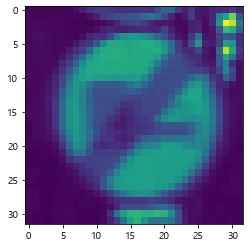

In [7]:
plt.imshow(dataset.X[-1, :, :, :].reshape(RESIZED_IMAGE))
print(dataset.y[-1, :])

<font color=red><b>

#### < 훈련용 데이터 & 테스트 데이터 분리 >
</b></font>

In [8]:
from sklearn.model_selection import train_test_split

idx_train, idx_test = train_test_split(range(dataset.X.shape[0]), test_size=0.25, random_state=101)
# 이전에는 데이터를 4개변수에 담았는데 지금은 2개에 인덱스를 담은 이유는
# X는 4차원. y는 2차원이니까 4개변수에 담아오면 또 차원을 일일이 맞춰줘야하니꽈

X_train = dataset.X[idx_train, :, :, :] # (29406, 32, 32, 1)
X_test =  dataset.X[idx_test, :, :, :] # (9803, 32, 32, 1)
y_train = dataset.y[idx_train, :] # (29406, 43)
y_test = dataset.y[idx_test, :] # (9803, 43)

<font color=red><b>

#### < 모델 훈련 & 예측_함수로 준비 >
</b></font>

In [9]:
# 전체 데이터를 원하는 크기로 나눠서 훈련할 수 있게 만드는 함수
# minibatcher(훈련데이터, 훈련정답, 나눌사이즈, 데이터의 순서를 섞느냐 마느냐):
def minibatcher(X, y, batch_size, shuffle):
    assert X.shape[0] == y.shape[0]
    # → 예외처리 / 단위테스트 / 디버깅(개발중인)모드에서 이 조건이 맞지 않으면 에러를 띄움
    # → 실제 배포시에는 지워줘야하는 코드
    
    n_samples = X.shape[0] # X의 갯수를 받아놓고요
    
    if shuffle: # 어차피 받아온 값이 불린이니까 연산자 안썼음 ㅇㅇ
        idx = np.random.permutation(n_samples) # X갯수 받은거를 순서를 섞어서 인덱스 저장
    else:
        idx = list(range(n_samples)) # X갯수를 순서대로 인덱스 저장
    
    for k in range(int(np.ceil(n_samples/batch_size))): # 29406/10000을 반올림X, 올림으로 > range(3)
        from_idx = k * batch_size
        to_idx = (k+1) * batch_size
        yield X[idx[from_idx:to_idx], :, :, :], y[idx[from_idx:to_idx], :] # 작업이 안정적으로 되도록 한거라는데 어떤 부분에서 안정적으로 처리한다는 건지 못들음 ㅇㅋ;;
        # X, y데이터를 끊어서 작업해서 함수를 호출하는 순간 10000씩 끊어진다고... 머라고.... 왓.....

In [10]:
for nb in minibatcher(X_train, y_train, 10000, True):
    print(nb[0].shape, nb[1].shape)

(10000, 32, 32, 1) (10000, 43)
(10000, 32, 32, 1) (10000, 43)
(9406, 32, 32, 1) (9406, 43)


<font color=red><b>

#### < Fully Connected Layer >
</b></font>

    - W, b : 고정 값
    - hypothesis, cost, train : 변동 가능
        → 그니까 두개를 따로 모듈화합니다 ㅇㅇ

In [11]:
# 가설 준비하는 함수
def fc_nn_activation_layer(in_tensors, n_units):
    W = tf.get_variable("fc_W", [in_tensors.get_shape()[1], n_units], tf.float32, tf.contrib.layers.xavier_initializer())
    b = tf.get_variable("fc_b",[n_units], tf.float32, tf.constant_initializer(0.0))
    # → in_tensor는 3차원(?)이니까 크기를 갖고오기 위해서 in_tensor.get_shape()[1] 요렇게
    # → n_units 요거는 걍 원래도 갯수를 가져올꺼라서 그냥 넣을거임 ㅇㅋ?
    return tf.matmul(in_tensors, W) + b

# 액티베이션 펑션 준비하는 함수
def fc_layer(is_tensors, n_units):
    return tf.nn.leaky_relu(fc_nn_activation_layer(is_tensors, n_units)) # 나중에 액티베이션 펑션을 바꾸고싶으면 리턴 부분만 바꿔주면 되니까~

<font color=red><b>

#### < Convolution Layer >
</b></font>

    - convoultion → layer → relu → Max Pooling → Drop Out

In [21]:
def conv_layer(in_tensors, kernel_size, n_units):
    W = tf.get_variable("conv_W", [kernel_size, kernel_size, in_tensors.get_shape()[3], n_units],
                        tf.float32, tf.contrib.layers.xavier_initializer())
    # [가로, 세로, 이전데이터에서입력받을갯수, 이미지갯수]
    b = tf.get_variable("conv_b", [n_units], tf.float32, tf.constant_initializer(0.0))
    return tf.nn.leaky_relu(tf.nn.conv2d(in_tensors, W, [1, 1, 1, 1], "SAME"))
#                          = tf.nn.conv2d(in_tensors, W, stirdes = [1, 1, 1, 1], padding = "SAME")

def maxpool_layer(in_tensors, sampling): # sampling : 필터사이즈
    return tf.nn.max_pool(in_tensors, ksize=[1, sampling, sampling, 1], strides=[1, sampling, sampling, 1], padding="SAME")
#                                      필터사이즈랑 스트라이드 사이즈 똑같이 하겠다


# 과적합을 해결하기 위해서 훈련할 때 노드연결을 랜덤하게 끊어버릴 것임
def dropout(in_tensors, keep_prob, is_training): # 입력값, 연결할 비율, 현재 훈련중인지아닌지(Maybe 불린값인듯)
    return tf.cond(is_training, lambda:tf.nn.dropout(in_tensors, keep_prob), lambda:in_tensors)
#                                true일때 in_tensors 입력값에 keep_prob비율로 드롭아웃해서 리턴
#                                                                              false일때 in_tensors 입력값 그대로 리턴
# tf.cond(불린값, true일경우 코드, false일경우 코드)
# → 컨디션, 함수 안에서 한줄로 조건문을 작성할 수 있음

<font color=red><b>

#### < summary >
</b></font>

    - convolution 1st : 5*5, 32필터
    - convolution 2nd : 5*5, 64필터
    - FC : 1024 unit
    - dropout : 40%
    - Activation Function : Softmax

In [22]:
def model(in_tensors, is_training):
    
    # 1st conv layer : 5*5, 32filter, 2x maxpool, 20% dropout(총 40%중에 1st, 2nd 20씩 나눠서 드롭아웃쓰)
    with tf.variable_scope("L1"):
        l1 = maxpool_layer(conv_layer(in_tensors, 5, 32), 2)
        #        def conv_layer(입력값, 필터사이즈, 사용필터개수)
        #def maxpool_layer(입력값, 필터사이즈)
        l1_out = dropout(l1, 0.8, is_training)
        #   def dropout(입력값, 연결할비율, 훈련여부)
    
    
    # 2nd conv layer : 5*5, 64filter, 2x maxpool, 20% dropout(총 40%중에 1st, 2nd 20씩 나눠서 드롭아웃쓰)
    with tf.variable_scope("L2"):
        l2 = maxpool_layer(conv_layer(l1_out, 5, 64), 2)
        #        def conv_layer(입력값, 필터사이즈, 사용필터개수)
        #def maxpool_layer(입력값, 필터사이즈)
        l2_out = dropout(l2, 0.8, is_training)
        #   def dropout(입력값, 연결할비율, 훈련여부)
    
    
    # 평면화 (1차원으로 평면화)
    # 전처리 끝나고 나서 FC로 넘길때 차원(4차원 안되니까 2차원으로) 풀어서 넘겨줌 
    # FC에게 값을 부드럽게 넘겨주기 위해서 값을 1차원으로 풀어서 넘겨줌
    # 그럼 FC 에서 개수 정할때 자연스럽게 차원하나 높여주게 됨 그래서 2차원되니까 걍 1차원으로 풀어주라고오오오오오오오옹놀오란올
    with tf.variable_scope("flatten"):
        l2_out_flat = tf.layers.flatten(l2_out)
    
    
    # FC layer : 1024 neurals? 40% dropout
    with tf.variable_scope("L3"):
        l3 = fc_layer(l2_out_flat, 1024)
        # def fc_layer(입력값, 출력개수)
        l3_out = dropout(l3, 0.6, is_training)
        #   def dropout(입력값, 연결할비율, 훈련여부)
    
    
    # output(출력~~~) :
    with tf.variable_scope("out"):
        out_tensors = fc_nn_activation_layer(l3_out, N_CLASS)
        # 출력계층에서는 실제 출력할 갯수를 직접 지정해야함
        # 출력할 갯수는 처음 지정했던 N_CLASS = 43
    
    return out_tensors # 이 결과값이 logit에 해당하는 부분이란마리야 아베마리아 저 흰 구름 끝 까지 날아

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

# 최종적으로 사용할 함수
def train_model(X_train, y_train, X_test, y_test, leanring_rate, max_epochs, batch_size):
    
    # 입렵값, 출력값, 훈련여부(미리 값을 지정할 수 없는 칭구칭긔들)을 만들어줘야한다구욤 ㅇㅅㅇ??
    in_X_tensors_batch = tf.placeholder(tf.float32, shape=(None, RESIZED_IMAGE[0], RESIZED_IMAGE[1], 1))
    # shape = convolution layer 작업하려면 4차원으로 넘겨줘야함
    
    in_y_tensors_batch = tf.placeholder(tf.float32, shape=(None, N_CLASS))
    # 엥?읭?
    
    is_training = tf.placeholder(tf.bool)
    # 형식은 불린이요~
    
    logit = model(in_X_tensors_batch, is_training) # 최종 결과(out_tensors)를 받아옴
    out_y_pred = tf.nn.softmax(logit) # hypothsis 대신 out_y_pred를 써봤어욤 나중에 헷갈리지 마시긔
    loss_score = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit, labels=in_y_tensors_batch) # = cost구한거임
    loss = tf.reduce_mean(loss_score)
    train = tf.train.AdamOptimizer(learning_rate=leanring_rate).minimize(loss) # 최저비용계산
    
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())
    
    # 훈련시작했다
    for epochs in range(max_epochs):
        print("Epoch = ", epochs)
        tf_score = []
        
        for mb in minibatcher(X_train, y_train, batch_size, True):
            tf_output = sess.run([train, loss], feed_dict={in_X_tensors_batch:mb[0],
                                              in_y_tensors_batch:mb[1],
                                              is_training:True}) # 훈련중이니까 True
            tf_score.append(tf_output[1])
            
        print("training_loss_score = ", np.mean(tf_score))
        # 훈련끝났다
    
    # 테스트시작했다
    print("TEST SET PERFORMANCE")
    y_test_pred, test_loss= sess.run([out_y_pred, loss], feed_dict={in_X_tensors_batch:X_test,
                                                                    in_y_tensors_batch:y_test,
                                                                    is_training:False}) # 훈련중이니까 True
    
    print("test_loss_score = ", test_loss)
    y_test_pred_classified = np.argmax(y_test_pred, axis=1).astype(np.int32)
    y_test_true_classified = np.argmax(y_test, axis=1).astype(np.int32)
    print(classification_report(y_test_true_classified, y_test_pred_classified))
    
    cm = confusion_matrix(y_test_true_classified, y_test_pred_classified)

    plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
    plt.colorbar()
    plt.tight_layout()
    
    plt.imshow(np.log2(cm+1), interpolation="nearest", cmap=plt.get_cmap("tab20"))
    plt.colorbar()
    plt.tight_layout()
    

Epoch =  0
training_loss_score =  5.712602
Epoch =  1
training_loss_score =  0.93257457
Epoch =  2
training_loss_score =  0.4429276
Epoch =  3
training_loss_score =  0.29042783
Epoch =  4
training_loss_score =  0.210653
Epoch =  5
training_loss_score =  0.16027048
Epoch =  6
training_loss_score =  0.13063973
Epoch =  7
training_loss_score =  0.10615033
Epoch =  8
training_loss_score =  0.091919884
Epoch =  9
training_loss_score =  0.08190063
TEST SET PERFORMANCE
test_loss_score =  0.06951824
              precision    recall  f1-score   support

           0       1.00      0.87      0.93        67
           1       0.95      0.99      0.97       539
           2       0.99      0.97      0.98       558
           3       0.98      0.98      0.98       364
           4       0.98      1.00      0.99       487
           5       0.96      0.96      0.96       479
           6       1.00      1.00      1.00       105
           7       1.00      0.96      0.98       364
           8    

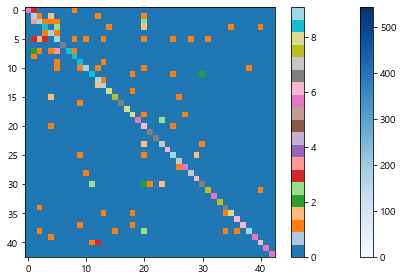

In [28]:
tf.reset_default_graph()

# train_model(훈련데이터, 훈련정답, 테스트데이터, 테스트정답, learning_rate, max_epochs, batch_size)
train_model(X_train, y_train, X_test, y_test, 0.001, 10, 256)

In [ ]:
<font color=red><b>

#### < 뀨 >
</b></font>